In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\clau_\AppData\Local\Temp\ipykernel_7400\2774366829.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
#Librerías relacionadas a la red
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#PASO 1. LEER LA BASE DE DATOS
ERBD = pd.read_csv("C:/Users/clau_/OneDrive/Documentos/FCFM/03_Tetramestre/Aprendizaje_Profundo/Clase 03/EarlyRetirementPrediction.csv")
display(ERBD)

,Retire Before 65 Years Old,Gender,Desease,Education Level,Marital Status,Monthly Income,Employee/Employer,Dependants,Unemployment Rate,Stock Market,Credit Score,Government Bonds Return
0,1,1,1,3,0,18000,0,4,3.444876,24066.16667,699,7.715833
1,0,1,0,3,0,32000,0,1,5.023797,42063.16667,639,5.414833
2,0,1,1,4,0,20000,0,2,5.355220,30100.50000,610,7.962750
3,0,0,1,4,1,35000,1,1,3.843570,24066.16667,649,7.715833
4,0,0,1,3,0,27000,0,1,4.949226,19439.00000,638,8.024167
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,0,0,5,1,26000,0,2,5.111358,32304.66667,604,7.193917
1496,0,1,0,3,0,32000,0,4,4.929185,41229.83333,753,5.910000
1497,1,1,1,4,1,17000,0,2,5.054852,37846.16667,631,6.198750
1498,0,0,0,5,0,26000,0,2,4.827790,41229.83333,613,5.910000


In [9]:
#DEFINIR CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE PRUEBA
train, test = train_test_split(ERBD, test_size=0.2)

In [10]:
train_x = train[["Gender", "Desease", "Education Level", "Marital Status", "Monthly Income", "Employee/Employer", "Dependants",
           "Unemployment Rate", "Stock Market", "Credit Score", "Government Bonds Return"]]
train_y = train[["Retire Before 65 Years Old"]]
test_x = test[["Gender", "Desease", "Education Level", "Marital Status", "Monthly Income", "Employee/Employer", "Dependants",
           "Unemployment Rate","Stock Market","Credit Score","Government Bonds Return"]]
test_y = test[["Retire Before 65 Years Old"]]

In [11]:
#EL MÓDULO DE ESTANDARIZAR SE GUARDA EN UN OBJETO
Standarize = StandardScaler()

In [12]:
#PROCEDEMOS A ESTANDARIZAR LOS CONJUNTOS DE PRUEBA Y ENTRENAMIENTO
train_xs = Standarize.fit_transform(train_x)
test_xs = Standarize.fit_transform(test_x)

In [13]:
test_xs

array([[ 0.7445832 ,  1.16713526,  0.07636035, ..., -0.14502816,
         0.40461542,  0.43731515],
       [ 0.7445832 ,  1.16713526,  1.22176568, ..., -0.27531705,
         0.65579067,  0.2700452 ],
       [ 0.7445832 ,  1.16713526, -1.06904497, ...,  0.42403   ,
         1.15814117, -0.64891922],
       ...,
       [-1.34303325, -0.85679872, -1.06904497, ..., -0.14502816,
         1.40931642,  0.43731515],
       [ 0.7445832 ,  1.16713526,  0.07636035, ...,  0.55179317,
        -1.15267113,  0.25951265],
       [-1.34303325, -0.85679872, -3.35985561, ..., -0.04150837,
        -0.18146016,  0.41177373]])

In [14]:
#DEFINIR RED NEURONAL
#11 NEURONAS EN LA CAPA DE ENTRADA
#PRIMER CAPA OCULTA CON 5 NEURONAS
#SEGUNDA CAPA OCULTA CON 3 NEURONAS
#CAPA DE SALIDA CON 1 NEURONA
model = Sequential()
model.add(Dense(5, input_dim = 11, activation = 'relu'))
model.add(Dense(3, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
#DEFINIR LA FUNCION DE PÉRDIDA Y EL OPTIMIZADOR
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [16]:
train_xs = np.asarray(train_xs)
train_y = np.asarray(train_y)
test_xs = np.asarray(test_xs)
test_y = np.asarray(test_y)

In [17]:
#ENTRENAR EL MODELO
model.fit(train_xs, train_y, epochs=150, batch_size=10)

Epoch 1/150


120/120 [==============================] - 1s 1ms/step - loss: 0.6992 - accuracy: 0.4775
Epoch 2/150
120/120 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.5775
Epoch 3/150
120/120 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6167
Epoch 4/150
120/120 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6467
Epoch 5/150
120/120 [==============================] - 0s 1ms/step - loss: 0.6618 - accuracy: 0.6558
Epoch 6/150
120/120 [==============================] - 0s 1ms/step - loss: 0.6560 - accuracy: 0.6700
Epoch 7/150
120/120 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.6825
Epoch 8/150
120/120 [==============================] - 0s 1ms/step - loss: 0.6425 - accuracy: 0.6933
Epoch 9/150
120/120 [==============================] - 0s 2ms/step - loss: 0.6344 - accuracy: 0.7150
Epoch 10/150
120/120 [==============================] - 0s 2ms/step - loss: 0.6255 - accu

In [18]:
#EVALUAR EL MODELO EN EL CONJUNTO DE PRUEBA
print("Evaluate on test data")
results = model.evaluate(test_xs, test_y)
print("test loss, test acc:", results)

Evaluate on test data


10/10 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7933
test loss, test acc: [0.48582082986831665, 0.7933333516120911]


In [19]:
#GENERAR PREDICCIONES DE PROBABILIDAD PARA EL CONJUNTO DE PRUEBA
print("Generate predictions for 3 samples")
predictions = model.predict(test_xs)
print("predictions shape:", predictions)

Generate predictions for 3 samples
10/10 [==============================] - 0s 2ms/step
predictions shape: [[0.13142589]
 [0.56258947]
 [0.10037196]
 [0.15213238]
 [0.09369371]
 [0.8892116 ]
 [0.09314554]
 [0.8983362 ]
 [0.11615761]
 [0.23292397]
 [0.89658105]
 [0.85168123]
 [0.09420636]
 [0.81361353]
 [0.8510132 ]
 [0.09249728]
 [0.86354303]
 [0.12760654]
 [0.09902335]
 [0.09814764]
 [0.7466085 ]
 [0.8356091 ]
 [0.8840079 ]
 [0.87515765]
 [0.10019842]
 [0.89235604]
 [0.88300353]
 [0.09397311]
 [0.11287753]
 [0.35671318]
 [0.40058413]
 [0.17490064]
 [0.76116496]
 [0.4292467 ]
 [0.7980562 ]
 [0.09300208]
 [0.8611116 ]
 [0.09983277]
 [0.720896  ]
 [0.09655046]
 [0.8369355 ]
 [0.7253834 ]
 [0.099267  ]
 [0.8615234 ]
 [0.09617548]
 [0.15549573]
 [0.11532854]
 [0.40062055]
 [0.09183858]
 [0.89120007]
 [0.09539297]
 [0.09644803]
 [0.82119966]
 [0.09402661]
 [0.09895925]
 [0.8690196 ]
 [0.7440934 ]
 [0.09392399]
 [0.8578864 ]
 [0.09524525]
 [0.72695327]
 [0.8993844 ]
 [0.8930487 ]
 [0.1027887

In [20]:
#GUARDAR LAS PREDICCIONES EN UNA DATA FRAME
PredictionsDF = pd.DataFrame(predictions)
PredictionsDF.columns = ["Probabilities"]
PredictionsDF.head(20)

,Probabilities
0,0.131426
1,0.562589
2,0.100372
3,0.152132
4,0.093694
5,0.889212
6,0.093146
7,0.898336
8,0.116158
9,0.232924


In [37]:
#DEFINIR EL UMBRAL ÓPTIMO
PredictionsDF["Umbral"] = 0
PredictionsDF.loc[PredictionsDF["Probabilities"] > 0.3, "Umbral"] = 1
PredictionsDF.head(20)

,Probabilities,Umbral
0,0.131426,0
1,0.562589,1
2,0.100372,0
3,0.152132,0
4,0.093694,0
5,0.889212,1
6,0.093146,0
7,0.898336,1
8,0.116158,0
9,0.232924,0


In [38]:
test_y = pd.DataFrame(test_y)
test_y.columns = ["Retire Before 65 Years Old"]
test_y.head()

,Retire Before 65 Years Old
0,0
1,0
2,0
3,0
4,0


In [39]:
PredictionsDF.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)
print(test_y)

     Retire Before 65 Years Old
0                             0
1                             0
2                             0
3                             0
4                             0
..                          ...
295                           0
296                           0
297                           0
298                           0
299                           1

[300 rows x 1 columns]


In [40]:
Results = pd.concat([PredictionsDF, test_y], axis = 1)
Results = pd.DataFrame(Results)
Results.head()

,Probabilities,Umbral,Retire Before 65 Years Old
0,0.131426,0,0
1,0.562589,1,0
2,0.100372,0,0
3,0.152132,0,0
4,0.093694,0,0


In [41]:
Results["PositivePositive"] = 0
Results["Sum1"] = Results["Umbral"] + Results["Retire Before 65 Years Old"]
Results.loc[Results["Sum1"] == 2, "PositivePositive"] = 1
Results.head()

,Probabilities,Umbral,Retire Before 65 Years Old,PositivePositive,Sum1
0,0.131426,0,0,0,0
1,0.562589,1,0,0,1
2,0.100372,0,0,0,0
3,0.152132,0,0,0,0
4,0.093694,0,0,0,0


In [26]:
#TASA DE VERDADEROS POSITIVOS
TPR=Results["PositivePositive"].sum()/Results["Retire Before 65 Years Old"].sum()
TPR

0.7162162162162162

In [27]:
Results["NegativeNegative"] = 0
Results.loc[Results["Sum1"] == 0, "NegativeNegative"] = 1
Results.head()

,Probabilities,Umbral,Retire Before 65 Years Old,PositivePositive,Sum1,NegativeNegative
0,0.131426,0,0,0,0,1
1,0.562589,0,0,0,0,1
2,0.100372,0,0,0,0,1
3,0.152132,0,0,0,0,1
4,0.093694,0,0,0,0,1


In [28]:
#TASA DE VERDADEROS NEGATIVOS
TNR=Results["NegativeNegative"].sum()/(300-Results["Retire Before 65 Years Old"].sum())
TNR

0.8486842105263158

In [29]:
#PRECISION BALANCEADA
BA=(TPR+TNR)/2
BA

0.7824502133712661

In [30]:
from sklearn.metrics import roc_curve, auc

In [31]:
fpr, tpr, thresholds = roc_curve(test_y["Retire Before 65 Years Old"], Results["Probabilities"])
roc_auc = auc(fpr, tpr)

In [34]:
# Encuentra el umbral óptimo
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

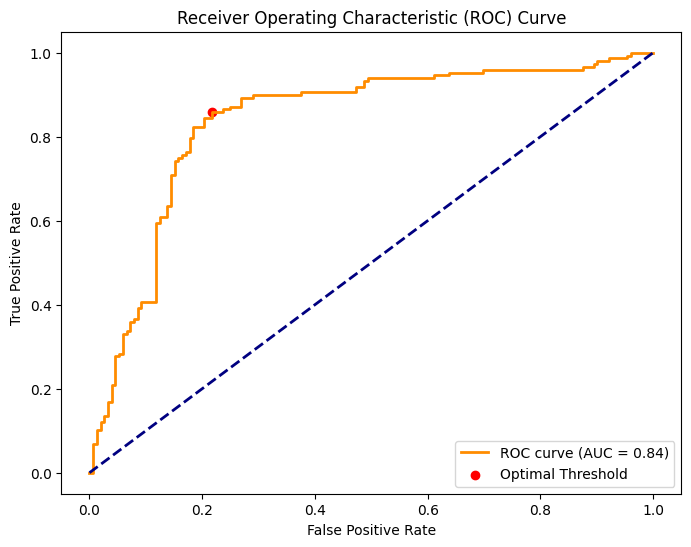

Umbral óptimo: 0.24307816


In [36]:
# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], marker='o', color='red', label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Umbral óptimo:", optimal_threshold)

In [42]:
conf_matrix = confusion_matrix(test_y["Retire Before 65 Years Old"], Results["Umbral"])

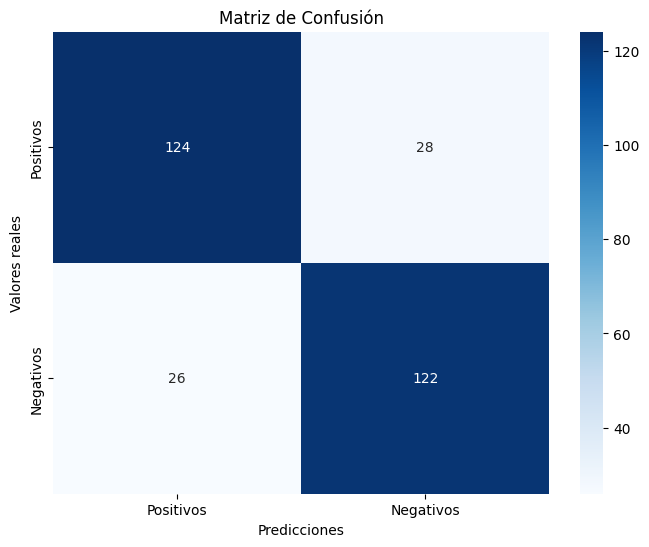

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positivos', 'Negativos'],
            yticklabels=['Positivos', 'Negativos'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()